In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from datetime import datetime
import time


In [50]:
#训练文件夹
# TrainFolder='H:\\12_Kaggle\\toollife\\01-TrainingData-qLua'
# TrainFolder='H:\\12_Kaggle\\toollife\\02-TestingData-poL3'
# TrainFolder='H:\\12_Kaggle\\toollife\\01-TrainingData-additional'
TrainFolder='H:\\12_Kaggle\\toollife\\02-TestingData-additional'

#预处理文件保存
dstPath='H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed'
# dstPath='H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed'

# TrainSubFolderList=['01\\Sensor','02\\Sensor','03\\Sensor']
TrainSubFolderList=['01\\Sensor','02\\Sensor','03\\Sensor','04\\Sensor','05\\Sensor']

In [44]:
#先读进来一个
testfile='1.csv'
testpath=os.path.join(TrainFolder,TrainSubFolderList[0])


df=pd.read_csv(os.path.join(testpath,testfile))
df_alldes=df.describe()

In [45]:
df_alldes

,vibration_1,vibration_2,vibration_3,current
count,1.548800e+06,1.548800e+06,1.548800e+06,1.548800e+06
mean,3.690002e-02,-1.428125e-03,1.967531e-02,5.030099e+01
std,5.205234e-02,4.844911e-02,7.919476e-02,3.462975e-01
min,-2.313941e-01,-2.402690e-01,-3.524650e-01,4.909108e+01
25%,1.863395e-03,-3.402353e-02,-3.375222e-02,5.000052e+01
50%,3.687642e-02,-1.458445e-03,1.963127e-02,5.030781e+01
75%,7.201144e-02,3.122860e-02,7.301475e-02,5.058713e+01
max,2.902634e-01,2.396695e-01,4.105401e-01,5.134548e+01


In [46]:
#获取行名称，列名称方法

row_count=len(df_alldes.index)
col_count=len(df_alldes.columns)
#建立一个列表存储展开以后的列名称
new_names=['Machine','SensorFileNo']
#第一列为机器号

for c in range(0,col_count):
    for r in range(0,row_count):
        col_name=df_alldes.columns[c]
        row_name=df_alldes.index[r]
        new_names.append(col_name+'_'+row_name)

In [47]:
#转换格式（每一个csv的信息，展开为1列）
df_Summary=pd.DataFrame(columns=new_names)
# x.rename(index={'A':'D', 'B':'E', 'C':'F'}, columns={'a':'d', 'b':'e', 'c':'f'}, inplace = True)
# x.rename(columns=['1x','x'], inplace = True)
df_Summary

,Machine,SensorFileNo,vibration_1_count,vibration_1_mean,vibration_1_std,vibration_1_min,vibration_1_25%,vibration_1_50%,vibration_1_75%,vibration_1_max,...,vibration_3_75%,vibration_3_max,current_count,current_mean,current_std,current_min,current_25%,current_50%,current_75%,current_max


In [48]:
TrainFolder

'H:\\12_Kaggle\\toollife\\02-TestingData-additional'

In [49]:
fileindex=0
for m in range(0,len(TrainSubFolderList)):
    
    machine_featurelist=[]
    
    TrainSubFolder=os.path.join(TrainFolder,TrainSubFolderList[m])
    print(TrainSubFolder)
    #在某个subfolder中循环
    for i in os.listdir(TrainSubFolder):
        
        filename=i
        filepath=os.path.join(TrainSubFolder,filename)
        df=pd.read_csv(filepath)
        print('reading..folder',m,'file: ',filename)
        des_of_this_df=df.describe()
        
        t=[x for x in range(0,34)]  #用来填充的空行
        df_Summary.loc[fileindex]=t  #每一个文件添加一行
        
        for r in range(0,row_count):
            #添加一列,index为列数量
            
            
            for c in range(0,col_count):

                col_name=des_of_this_df.columns[c]
                row_name=des_of_this_df.index[r]
                targetname=col_name+'_'+row_name

                df_Summary.loc[fileindex,'Machine']=str(m)  #Machine编号
                df_Summary.loc[fileindex,'SensorFileNo']=(i)
#                 print('writing..',df_alldes.iloc[r,c],'to',fileindex,targetname)
                df_Summary.loc[fileindex,targetname]=des_of_this_df.iloc[r,c]
    
#         print(df_Summary)
    
        fileindex+=1
    

H:\12_Kaggle\toollife\02-TestingData-additional\01\Sensor
reading..folder 0 file:  1.csv
reading..folder 0 file:  10.csv
reading..folder 0 file:  2.csv
reading..folder 0 file:  3.csv
reading..folder 0 file:  4.csv
reading..folder 0 file:  5.csv
reading..folder 0 file:  6.csv
reading..folder 0 file:  7.csv
reading..folder 0 file:  8.csv
reading..folder 0 file:  9.csv
H:\12_Kaggle\toollife\02-TestingData-additional\02\Sensor
reading..folder 1 file:  1.csv
reading..folder 1 file:  10.csv
reading..folder 1 file:  2.csv
reading..folder 1 file:  3.csv
reading..folder 1 file:  4.csv
reading..folder 1 file:  5.csv
reading..folder 1 file:  6.csv
reading..folder 1 file:  7.csv
reading..folder 1 file:  8.csv
reading..folder 1 file:  9.csv
H:\12_Kaggle\toollife\02-TestingData-additional\03\Sensor
reading..folder 2 file:  1.csv
reading..folder 2 file:  10.csv
reading..folder 2 file:  2.csv
reading..folder 2 file:  3.csv
reading..folder 2 file:  4.csv
reading..folder 2 file:  5.csv
reading..folder 2

In [51]:
targetfile

'H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed\\Summary_ALL_Sensor_Additional.csv'

In [52]:
#第一个文件夹01，从1-48个csv

targetfile=os.path.join(dstPath,'Summary_ALL_Sensor_Test_Additional.csv')

df_Summary.to_csv(targetfile)

In [54]:
#转换方向
df_des=df_alldes.transpose()

In [58]:
# df_des

,count,mean,std,min,25%,50%,75%,max
1,1548800.0,-0.319054,36.355980,-60.445788,-36.696067,-0.436967,35.934917,59.412173
2,1548800.0,-0.319054,36.355980,-60.445788,-36.696067,-0.436967,35.934917,59.412173
3,1548800.0,-0.330611,35.652936,-59.121963,-35.963119,-0.410578,35.245691,58.783423
4,1548800.0,-0.322389,35.504967,-58.929199,-35.789664,-0.405827,35.098154,58.372149
5,1536000.0,-0.316911,35.359442,-58.991509,-35.645820,-0.398568,34.970797,58.205663
6,1548800.0,-0.336673,35.278505,-58.847948,-35.571867,-0.420864,34.867719,57.712008
7,1548800.0,-0.335277,35.172671,-58.283641,-35.468860,-0.407568,34.759209,57.731545
8,1548800.0,-0.332604,35.084721,-58.304839,-35.386574,-0.410625,34.670847,57.708590
9,1548800.0,-0.346689,35.055133,-58.046378,-35.368927,-0.432671,34.648284,57.471735
10,1548800.0,-0.328687,35.035341,-58.406411,-35.322664,-0.409026,34.630582,57.384682


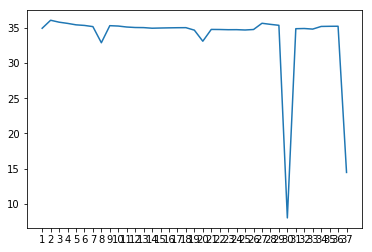

In [23]:
plt.plot(df_des['std'])

In [25]:
df_des.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

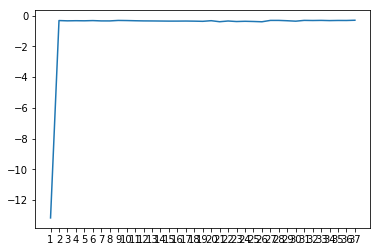

In [28]:
plt.plot(df_des['mean'])